In [2]:
import os

# use either 'tensorflow' or 'theano'
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [52]:
from keras.models import Input, Model
from keras.layers import Conv1D, Dense, Activation, MaxPool1D, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1_l2
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

In [140]:
def cnn_1d(n_rows, n_cols, n_filters, n_classes, n_pool=1, learning_rate=0.005):
    # the input layer
    data_input = Input(shape=(n_rows, n_cols))

    l1 = 0
    l2 = 1e-4
    coeff_activity = 0.0

    # the filters
    convolution = Conv1D(
        n_filters,
        1,
        activation='relu',
        kernel_regularizer=l1_l2(l1=l1, l2=l2),
        strides=1,
        padding='same',
        name='conv1'
    )(data_input)
    
    #convolution = Dropout(rate=0.5)(convolution)

    #convolution = Activation('relu')(convolution)

    # the cell grouping part
    pooled = MaxPool1D(pool_size=n_pool)(convolution)

    # network prediction output
    output = Dense(
        n_classes,
        activation='softmax',
        kernel_regularizer=l1_l2(l1=l1, l2=l2),
        name='output'
    )(pooled)

    model = Model(inputs=data_input, outputs=output)

    model.compile(
        optimizer=Adam(lr=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

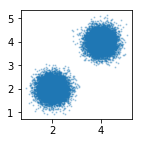

In [163]:
n_features = 2
points_per_feature = 10000
centers = [(2, 2), (4, 4)]

data, labels = make_blobs(
    n_samples=points_per_feature * n_features,
    n_features=n_features,
    centers=centers,
    cluster_std=0.3,
    random_state=5
)

plt.figure(figsize=(2,2))
plt.scatter(data[:, 0], data[:, 1], s=1, alpha=0.3)

In [164]:
data[0:3]

array([[2.17708414, 1.37538287],
       [4.05104876, 3.81916713],
       [3.76084191, 4.36784065]])

In [165]:
data.shape

(20000, 2)

In [166]:
# the data need to be in the order:
#   batch size, rows, cols
# So, we first expand to 3-D, then switch the last 2 axes
print(data.shape)
data = np.expand_dims(data, axis=2)
print(data.shape)
data = np.swapaxes(data, 2, 1)
print(data.shape)

(20000, 2)
(20000, 2, 1)
(20000, 1, 2)


In [167]:
labels

array([0, 1, 1, ..., 1, 1, 1])

In [168]:
labels.shape

(20000,)

In [169]:
binary_labels = to_categorical(labels)
binary_labels

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [170]:
binary_labels = np.int32(binary_labels)
binary_labels

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int32)

In [171]:
model = cnn_1d(n_rows=1, n_cols=2, n_filters=5, n_classes=2, n_pool=1, learning_rate=0.1)

In [172]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 1, 2)              0         
_________________________________________________________________
conv1 (Conv1D)               (None, 1, 5)              15        
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 1, 5)              0         
_________________________________________________________________
output (Dense)               (None, 1, 2)              12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [173]:
model.fit(
    data, 
    np.expand_dims(binary_labels, axis=1), 
    batch_size=points_per_feature * n_features,
    epochs=1000,
    validation_split=0.3,
    verbose=2
)

Train on 14000 samples, validate on 6000 samples
Epoch 1/1000
 - 1s - loss: 2.7993 - acc: 0.4987 - val_loss: 1.5389 - val_acc: 0.5030
Epoch 2/1000
 - 0s - loss: 1.5506 - acc: 0.4987 - val_loss: 0.9056 - val_acc: 0.4417
Epoch 3/1000
 - 0s - loss: 0.9079 - acc: 0.4342 - val_loss: 0.7781 - val_acc: 0.4970
Epoch 4/1000
 - 0s - loss: 0.7761 - acc: 0.5013 - val_loss: 0.7535 - val_acc: 0.4970
Epoch 5/1000
 - 0s - loss: 0.7505 - acc: 0.5013 - val_loss: 0.7656 - val_acc: 0.4970
Epoch 6/1000
 - 0s - loss: 0.7623 - acc: 0.5013 - val_loss: 0.7708 - val_acc: 0.4970
Epoch 7/1000
 - 0s - loss: 0.7674 - acc: 0.5013 - val_loss: 0.7700 - val_acc: 0.4970
Epoch 8/1000
 - 0s - loss: 0.7666 - acc: 0.5013 - val_loss: 0.7643 - val_acc: 0.4970
Epoch 9/1000
 - 0s - loss: 0.7612 - acc: 0.5013 - val_loss: 0.7558 - val_acc: 0.4970
Epoch 10/1000
 - 0s - loss: 0.7536 - acc: 0.5013 - val_loss: 0.7433 - val_acc: 0.4970
Epoch 11/1000
 - 0s - loss: 0.7407 - acc: 0.5013 - val_loss: 0.7323 - val_acc: 0.4970
Epoch 12/1000


Epoch 96/1000
 - 0s - loss: 0.0141 - acc: 1.0000 - val_loss: 0.0138 - val_acc: 1.0000
Epoch 97/1000
 - 0s - loss: 0.0139 - acc: 1.0000 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 98/1000
 - 0s - loss: 0.0136 - acc: 1.0000 - val_loss: 0.0135 - val_acc: 1.0000
Epoch 99/1000
 - 0s - loss: 0.0135 - acc: 1.0000 - val_loss: 0.0134 - val_acc: 1.0000
Epoch 100/1000
 - 0s - loss: 0.0133 - acc: 1.0000 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 101/1000
 - 0s - loss: 0.0132 - acc: 1.0000 - val_loss: 0.0131 - val_acc: 1.0000
Epoch 102/1000
 - 0s - loss: 0.0131 - acc: 1.0000 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 103/1000
 - 0s - loss: 0.0129 - acc: 1.0000 - val_loss: 0.0128 - val_acc: 1.0000
Epoch 104/1000
 - 0s - loss: 0.0128 - acc: 1.0000 - val_loss: 0.0127 - val_acc: 1.0000
Epoch 105/1000
 - 0s - loss: 0.0126 - acc: 1.0000 - val_loss: 0.0125 - val_acc: 1.0000
Epoch 106/1000
 - 0s - loss: 0.0125 - acc: 1.0000 - val_loss: 0.0123 - val_acc: 1.0000
Epoch 107/1000
 - 0s - loss: 0.0123 - acc: 1.00

Epoch 191/1000
 - 0s - loss: 0.0073 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 192/1000
 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0073 - val_acc: 1.0000
Epoch 193/1000
 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 194/1000
 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 195/1000
 - 0s - loss: 0.0072 - acc: 1.0000 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 196/1000
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 197/1000
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 198/1000
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 199/1000
 - 0s - loss: 0.0071 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 200/1000
 - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 201/1000
 - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 202/1000
 - 0s - loss: 0.0070 - acc: 

 - 0s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 286/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 287/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 288/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 289/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 290/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 291/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 292/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 293/1000
 - 0s - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 294/1000
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 295/1000
 - 0s - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 296/1000
 - 0s - loss: 0.0054 - acc: 1.0000 - val_lo

Epoch 380/1000
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 381/1000
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 382/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 383/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 384/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0046 - val_acc: 1.0000
Epoch 385/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 386/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 387/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 388/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 389/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 390/1000
 - 0s - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 391/1000
 - 0s - loss: 0.0045 - acc: 

 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 1.0000
Epoch 475/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 476/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 477/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 478/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 479/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 480/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 481/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 482/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 483/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 484/1000
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 485/1000
 - 0s - loss: 0.0037 - acc: 1.0000 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 570/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 571/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 572/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 573/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 574/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 575/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 576/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 577/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 578/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 579/1000
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 580/1000
 - 0s - loss: 0.0032 - acc: 

 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 664/1000
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 665/1000
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 666/1000
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 667/1000
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 668/1000
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 669/1000
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 670/1000
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 671/1000
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 672/1000
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 673/1000
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 674/1000
 - 0s - loss: 0.0027 - acc: 1.0000 - val_lo

Epoch 758/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 759/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 760/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 761/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 762/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 763/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 764/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 765/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 766/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 767/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 768/1000
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 769/1000
 - 0s - loss: 0.0024 - acc: 

 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 853/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 854/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 855/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 856/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 857/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 858/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 1.0000
Epoch 859/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 860/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 861/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 862/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 863/1000
 - 0s - loss: 0.0021 - acc: 1.0000 - val_lo

Epoch 947/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 948/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 949/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 950/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 951/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 952/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 953/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 954/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 955/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 956/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 957/1000
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 958/1000
 - 0s - loss: 0.0019 - acc: 

In [174]:
test_data = np.array(
    [
        [2, 2], [4, 4], [3, 3], [2.0, 4.0], [2.5, 2.5]
    ]
)

model.predict(np.expand_dims(test_data, 1))

array([[[9.9998426e-01, 1.5718379e-05]],

       [[4.0608522e-04, 9.9959391e-01]],

       [[5.0488085e-01, 4.9511921e-01]],

       [[4.4539079e-01, 5.5460924e-01]],

       [[9.9608922e-01, 3.9108000e-03]]], dtype=float32)